In [2]:
%load_ext autoreload
%autoreload 2
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc


In [11]:
model = KeyedVectors.load('data/model.model')
keys = ['tokyo', 'shirt', 'sunday', 'tolstoy', 'twitter', 'bachelor', 'island', 'election', 'expensive',
        'experience', 'financial', 'banana', 'peace', 'release', 'war']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=6):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [12]:
from sklearn.manifold import TSNE
import numpy as np
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


C:\Users\pc\AppData\Local\Temp\ipykernel_3816\838596788.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


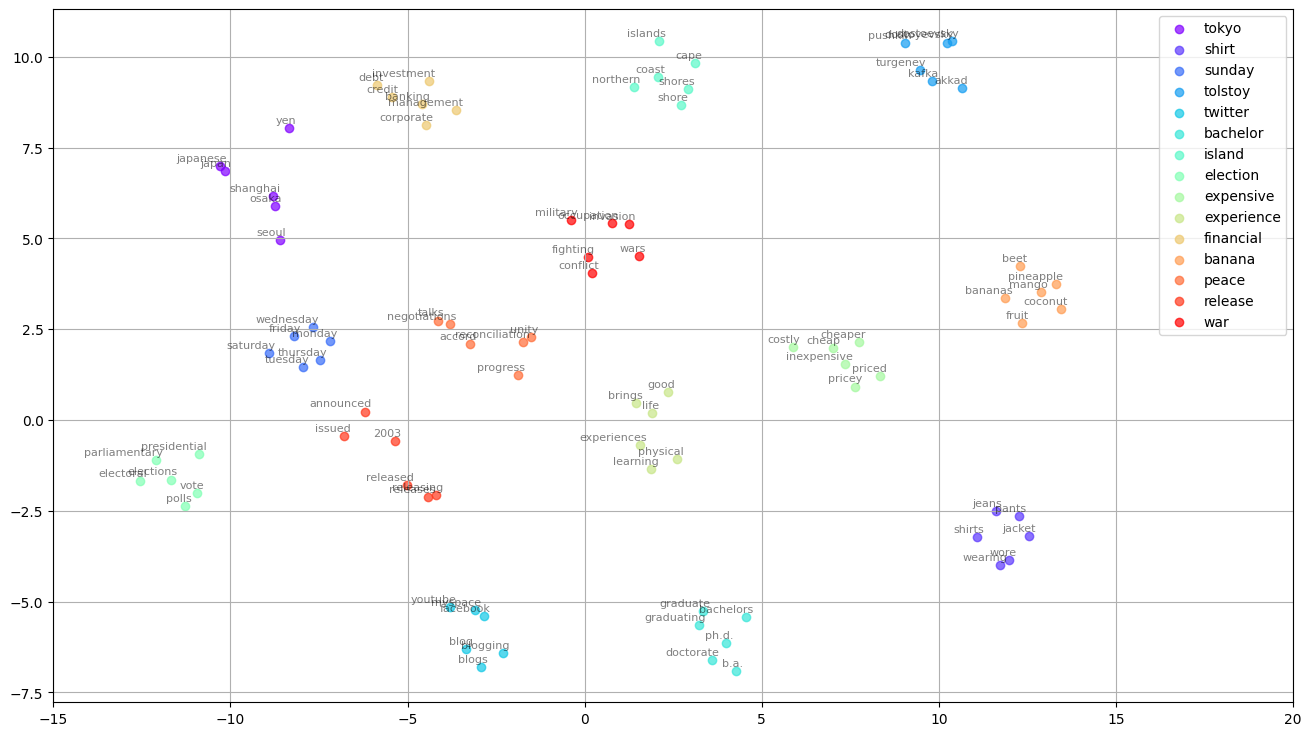

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc='upper right')
    plt.xlim(-15, 20)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='svg', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters, 0.7,
                        'paper/figures/clusters.svg')

In [ ]:
import matplotlib.pyplot as plt

# Set the text rendering engine to LaTeX
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })
# Create a simple plot with LaTeX text
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

plt.plot(x, y)  # LaTeX expression inside r'$...$'

# Add labels and title
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'A Simple Plot with LaTeX Text')

# Add a legend
plt.legend()

# Show the plot
plt.show()
